In [8]:
!pip install nilearn

![SCAN-Unit](img/scan-unit-logo.png "SCAN-Unit")

# SCAN-Unit Data Science Dojo

# Chapter 3. fMRI second level analysis - Part One

### Visualization with Nilearn

Nilearn is a Python module for statistical learning on neuroimaging data. But it can also be used for easy visualization of this data. In this chapter we will apply and broaden our knowledge from the previous chapter and learn how to integrate it into nilearn to create flexible visualization methods.

https://nilearn.github.io/

First things first: let's start with loading our libraries and data. Nilearn comes with example data, such as the 'rsn10' dataset. This data set contains ten 'resting state networks' which are stored in a 4D nifti file.

Nifti files are 3D or 4D image files, in which fMRI data can be stored. Usually a 4D file will have the variable 'time' as fourth dimension, but in our example it is used to store the ten different resting state networks.

To get a quick look, where the data is stored we can use *print('Datasets are stored in: %r' % datasets.get_data_dirs())*.

In [7]:
%matplotlib inline
from nilearn import plotting
from nilearn import datasets
from nilearn import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
rsn = datasets.fetch_atlas_smith_2009()['rsn10']
print('Datasets are stored in: %r' % datasets.get_data_dirs())


Dataset created in /root/nilearn_data/smith_2009



Downloaded 8675328 of 15129514 bytes (57.3%,    0.8s remaining) ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 33513472 of 53028809 bytes (63.2%,    1.3s remaining) ...done. (4 seconds, 0 min)


Downloaded 9224192 of 19114114 bytes (48.3%,    1.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 7774208 of 9566632 bytes (81.3%,    0.2s remaining) ...done. (2 seconds, 0 min)


Downloaded 59441152 of 67017538 bytes (88.7%,    0.4s remaining)

Datasets are stored in: ['/root/nilearn_data']


 ...done. (4 seconds, 0 min)


To know what we are working with we can have a look at the shape of our data.

In [9]:
print(image.load_img(rsn).shape)

(91, 109, 91, 10)


To plot an overlook of our data we can use a *for loop* and an iteration to visualize a certain 3D axis of every forth dimension. In our case we cut through every one of the ten networks stored in the .nii file.

The *plotting.plot_stat_map()* command is used to plot our data and to specify for example which display mode, threshold and cut coordinates we want to use.

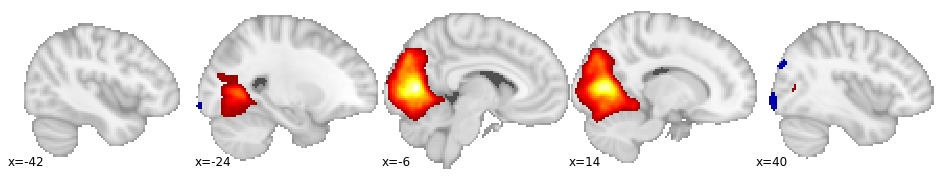

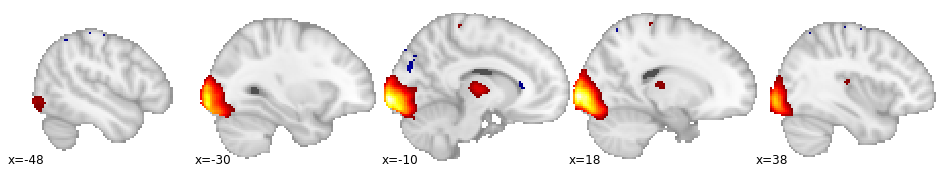

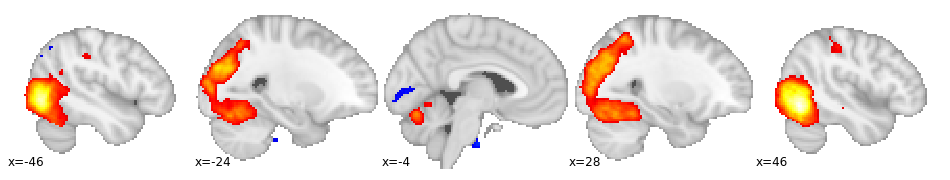

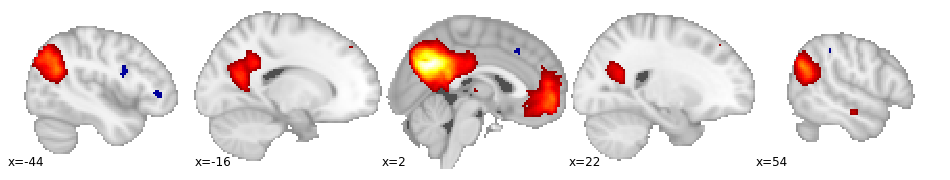

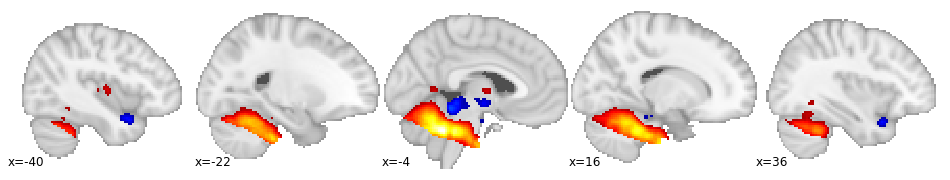

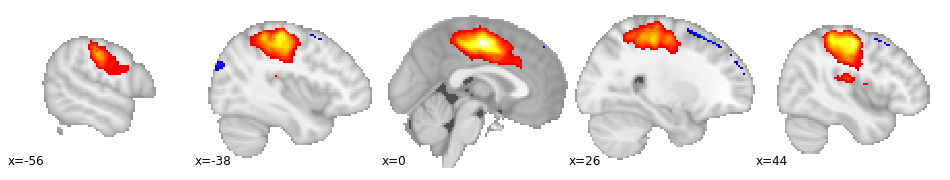

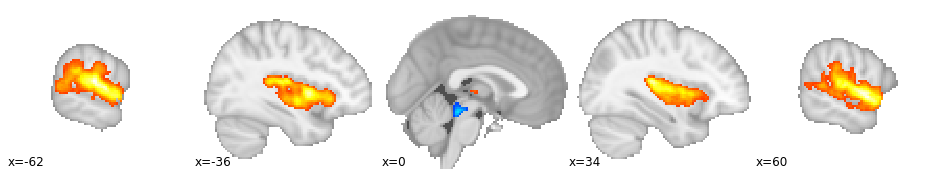

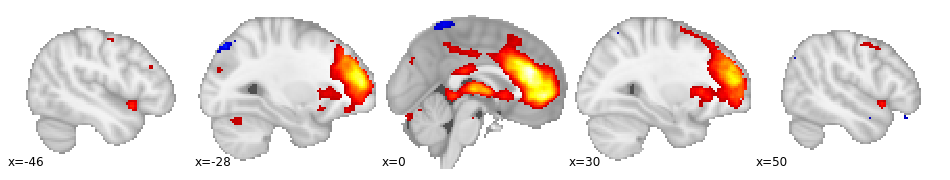

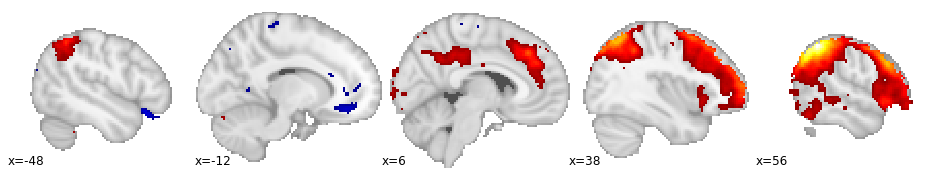

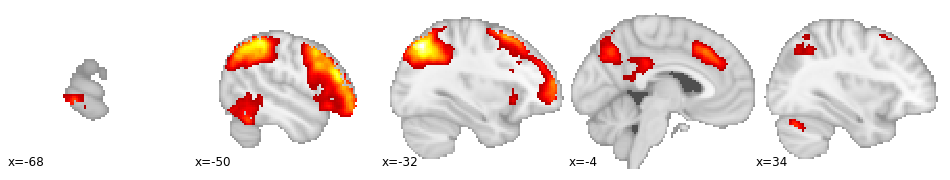

In [10]:
for img in image.iter_img(rsn):
    plotting.plot_stat_map(img, threshold=3, display_mode="x", cut_coords=(5) , colorbar = False)

Now let's focus on one of these networks, so we can work with it as a 3D nifti file. We pick the forth one in the fourth dimension - the default mode network. Remember, when we count in Python we start from 0, so it would be number 3. 

On neurosynth.org you can also have a look at the default mode network: https://neurosynth.org/analyses/terms/default%20mode/
But more on that later...

When we do not define a display mode in *plot_stat_map*() it will automatically be *'ortho'*, which will depict all three axes.

In [11]:
rsn_four = image.index_img(rsn, 3)
print(rsn_four.shape)

(91, 109, 91)


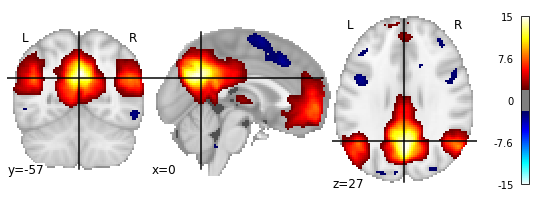

In [12]:
plotting.plot_stat_map(rsn_four, threshold = 2)

#### Mosaic Function

Now, what if we want to have a way to visualize our data in a mosaic (a x by y grid) and have the possibility to change the number of rows and columns, the step size, the axis or the range of coordinates to display a specific region?

We can do that by ourselves, by applying the things we have learned and integrate it in the nilearn module.

But where do we begin? As we have already learned: at the easiest step.

Let's start with creating a matplotlib figure with 5 rows and 1 column.

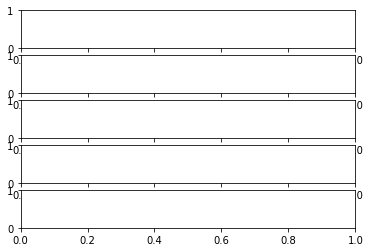

In [13]:
fig, ax = plt.subplots(5,1)

The way this will work is, that these subplot rows will simply be filled with the visualizations of nilearn. So we try to fill it with something simple first. To do that, we use a *for loop*.

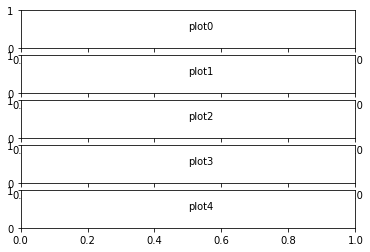

In [14]:
plots=['plot0', 'plot1', 'plot2', 'plot3', 'plot4']
fig, ax = plt.subplots(5,1)

for count, x in enumerate(plots):
    ax[count].text(0.5,0.5,str((x)))

We see the loop and *enumerate* command is good for filling our subplots. But how are we going to fill it with images? We can use *np.arange* to first print a row coordinates in our subplots (and later assign an image to every coordinate). For this we define some new variables and for now a fixed range of coordinates and fixed step size [-25,25,2].

This would give us 25 cuts, perfect for a 5x5 grid, so let's stick with that for now. 

[-25 -23 -21 -19 -17 -15 -13 -11  -9  -7  -5  -3  -1   1   3   5   7   9
  11  13  15  17  19  21  23]
0
1
2
3
4


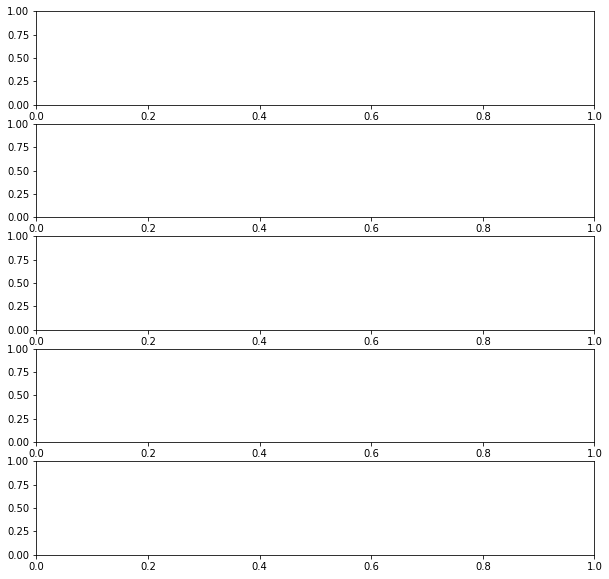

In [15]:
cols = 5
rows = 5 
cuts = np.arange(-25,25,2)
fig, axes = plt.subplots(rows,1, figsize=(10,10))
print(cuts)
for a, ax in enumerate(axes):
    print(a)


But how can we print our *np.arange* in a line that runs down our 5 rows continuously? For that we need to do a little bit math. First we create a "layout" and tell our loop to print the index first, so we have a better overview of what's going on:

$ (f'{a}: {}') $

Next we have to figure out the formula for our Cut-Coordinates. So because these will be positional information for our "cuts" variable we begin with implementing that. Because of this we also know that we have to start with 0 and increase the positions by the amount of cols we have. This means, taking the index (*a*) into the calculation and multiplying it with the amount of cols is a good start.

$ (f'{a}: {cuts[a*cols:]}') $

Now where should our range end? When we think about it for the first row, where our index is 0, the answer becomes quite simple: We just add the amount of cols.

$ (f'{a}: {cuts[a*cols:a*cols+cols]}') $

Now let's try how this works in our code:

[-25 -23 -21 -19 -17 -15 -13 -11  -9  -7  -5  -3  -1   1   3   5   7   9
  11  13  15  17  19  21  23]
0: [-25 -23 -21 -19 -17]
1: [-15 -13 -11  -9  -7]
2: [-5 -3 -1  1  3]
3: [ 5  7  9 11 13]
4: [15 17 19 21 23]


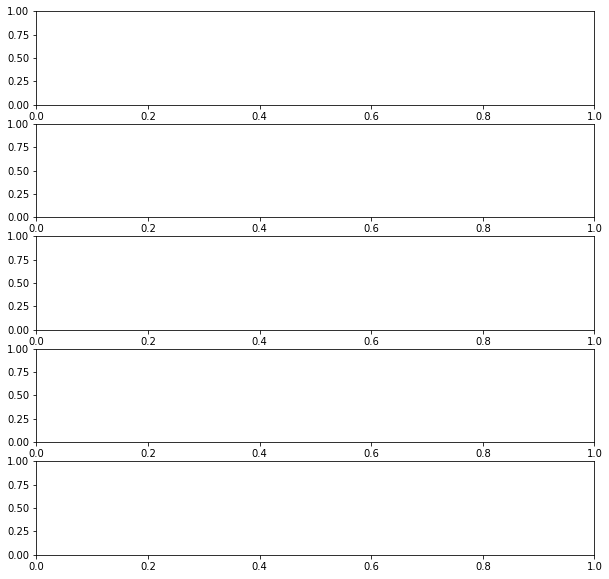

In [16]:
cols = 5
rows = 5 
cuts = np.arange(-25,25,2)
fig, axes = plt.subplots(rows,1, figsize=(10,10))
print(cuts)
for a, ax in enumerate(axes):
    print(f'{a}: {cuts[a*cols:a*cols+cols]}')


Looks good! Now we have everything we need to try it with the nilearn *plot_stat_map()* function. For this we take the *cut_coords* parameter of the function and set it to our formula. Then we set the axis parameter to our ax from the for loop and fill in the other parameters we wish to set. Let's leave the *print* command in there for now to have an overview of what's going on.

[-25 -23 -21 -19 -17 -15 -13 -11  -9  -7  -5  -3  -1   1   3   5   7   9
  11  13  15  17  19  21  23]
0: [-25 -23 -21 -19 -17]
1: [-15 -13 -11  -9  -7]
2: [-5 -3 -1  1  3]
3: [ 5  7  9 11 13]
4: [15 17 19 21 23]


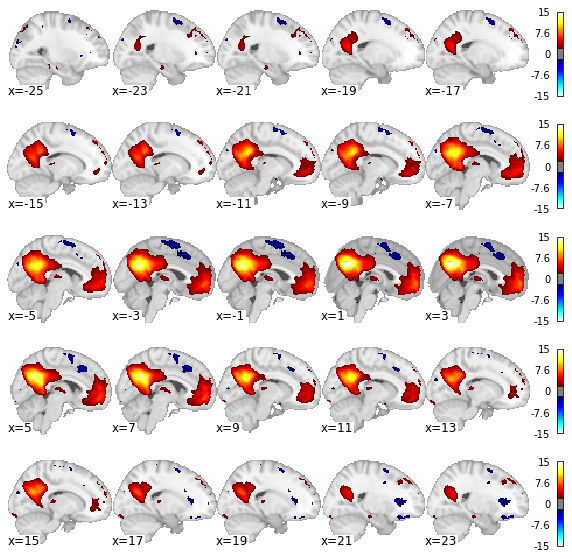

In [17]:
cols = 5
rows = 5 
cuts = np.arange(-25,25,2)
fig, axes = plt.subplots(rows,1, figsize=(10,10))
print(cuts)
for a, ax in enumerate(axes):
    print(f'{a}: {cuts[a*cols:a*cols+cols]}')
    plotting.plot_stat_map(rsn_four, display_mode='x', axes=ax, cut_coords=cuts[a*cols:a*cols+cols], threshold=2)

So far so good. We now have a solid foundation to build our function upon and make it more flexible and practical. The next steps include making an actual function out of our piece of code and defining some parameters for it and adding a few lines to save our plot as an PNG file. This can be useful if we want to show the plot in a summary in a markdown cell.

We call the function "mosaic" and define the parameters rows, cols, axis and thresh. To broaden the range we can visualize, let's set a parameter for the beginning and end of our *np.arange* - i=-55 and j=55. To make our stepsize flexible we can define stepsize $ k =  ((+i)+j)/(rows*cols) $

For k we also make sure that always the whole number is used to get consistent stepsizes.

And don't forget to change the parameters in the plot function to our new variables we defined in our function!

In [18]:
def mosaic(axis,thresh,rows=5,cols=5,i=-55,j=55): 
    k = np.ceil((abs(i)+j)/(rows*cols))
    cuts = np.arange(i,j,k)
    rsn_img='rsn_img.png'
    fig, axes = plt.subplots(rows,1, figsize=(10,10))
    print(cuts)
    for a, ax in enumerate(axes):
        print(f'{a}: {cuts[a*cols:a*cols+cols]}')
        display=plotting.plot_stat_map(rsn_four, display_mode=axis, axes=ax, cut_coords=cuts[a*cols:a*cols+cols], threshold=thresh)
    display.savefig(rsn_img)

Looks like everything went well. Let's try to plot.

[-55. -50. -45. -40. -35. -30. -25. -20. -15. -10.  -5.   0.   5.  10.
  15.  20.  25.  30.  35.  40.  45.  50.]
0: [-55. -50. -45. -40. -35.]
1: [-30. -25. -20. -15. -10.]
2: [-5.  0.  5. 10. 15.]
3: [20. 25. 30. 35. 40.]
4: [45. 50.]


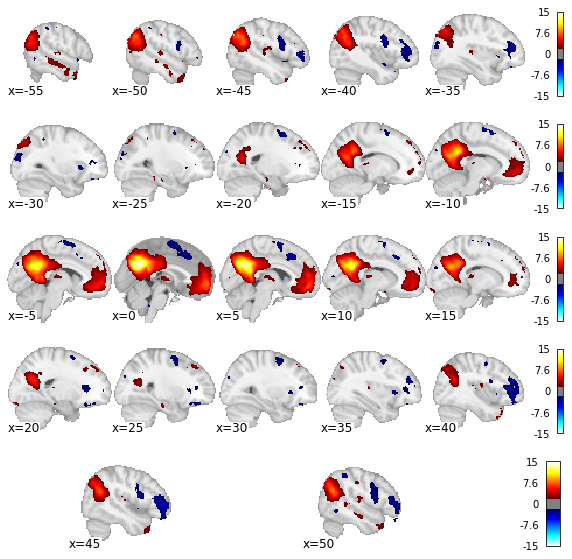

In [19]:
mosaic(axis='x',thresh=2)

Now, to make the function even more flexible we can set the parameters in our function header to *None*. This way we don't need to type them in for the function to work and we can define conditions to set them to a desired value when we don't type them in or the value is out of bounds. 

To set the conditions we use *if ... or ... is:*. We could also use *elif*, but this way we need less space.

We can set the threshold parameter to 3.15, which is a common value for visualization.

[-55. -48. -41. -34. -27. -20. -13.  -6.   1.   8.  15.  22.  29.  36.
  43.  50.]
0: [-55. -48. -41. -34.]
1: [-27. -20. -13.  -6.]
2: [ 1.  8. 15. 22.]
3: [29. 36. 43. 50.]


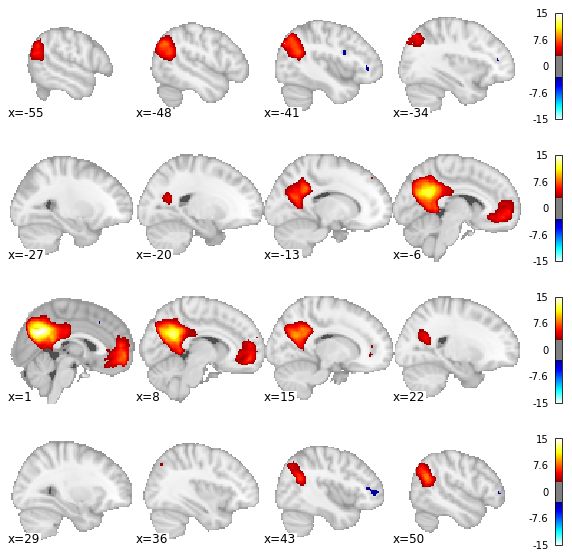

In [20]:
def mosaic(axis,i=None,j=None,k=None,rows=None,cols=None,thresh=3.15): 
    if i is None or i < -55:
        i = -55
    if j is None or j > 55:
        j = 55
    if rows is None or rows <= 0:
        rows = 4
    if cols is None or cols <= 0:
        cols = 4
    if k is None or k <= 0:
        k = np.ceil((abs(i)+j)/(rows*cols))
    cuts = np.arange(i,j,k)
    rsn_img='rsn_img.png'
    fig, axes = plt.subplots(rows,1, figsize=(10,10))
    print(cuts)
    for a, ax in enumerate(axes):
        print(f'{a}: {cuts[a*cols:a*cols+cols]}')
        display=plotting.plot_stat_map(rsn_four, display_mode=axis, axes=ax, cut_coords=cuts[a*cols:a*cols+cols], threshold=thresh)
    display.savefig(rsn_img)
    
mosaic(axis='x')

Maybe you noticed, that we have a little problem with how the mosaic-layout turns out sometimes. This is because we designed it so that the number of columns is always set to 1 and only the number of rows is calculated from the input. This way if the range of our cut coordinates doesn't satisfy the amount of rows, the arrangement seems off compared to the rest of the plot.

If we want to design this function for practical visualization of our fMRI-Data and maybe to get image files from it, which are ready to use even in a scientific paper, it would be good to get output with a nice layout.

To achieve this we won't just add code to our existing function. We will have to change some parts of it. Now, let's remember - to solve problems we have to break them down into small parts and take one step at a time. 

First I want you to think about, where the problem lies. Not necessarily the part of the code but the logical aspect. I already talked about that in the first paragraph. Then think about what we would have to change to get the desired outcome. After that we can begin to translate our thoughts into code.

Really try to think about it some time and then continue with the exercise.

...



As we said a good point to put our finger on first is the fact that we have only one column and add more rows as we go, filling them with our plots. What if we create a separate subplot for each of our plots - a subplot grid so to say.

How and where do we tackle that issue?

As our plotting is taking place in the *for-loop* I would say we start there. To get a subplot per row and column we will use a *nested for-loop* - a for-loop within a for-loop. One for our rows and one for our columns.

But let's start small.

Let's just throw everything out of our code, we don't necessarily need for this operation.

So we end up with a number of rows and columns and a line for our subplots.

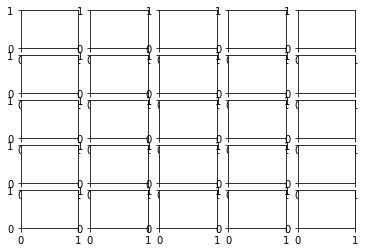

In [21]:
rows = 5
cols = 5
fig, axes = plt.subplots(rows, cols)

Next we try and fill every of these separate subplots with a value, e.g. the number of the row they are in. Again, think about it by yourself first and try to solve it. I give you a hint: you have to use the *range()* command so you can iterate the rows and columns.

To get an overview what's going on in our code we can use *print(f'plotting at index [ {r} , {c}]')*. This will print out the every single index we plot in.

plotting at index [ 0 , 0]
plotting at index [ 0 , 1]
plotting at index [ 0 , 2]
plotting at index [ 0 , 3]
plotting at index [ 0 , 4]
plotting at index [ 1 , 0]
plotting at index [ 1 , 1]
plotting at index [ 1 , 2]
plotting at index [ 1 , 3]
plotting at index [ 1 , 4]
plotting at index [ 2 , 0]
plotting at index [ 2 , 1]
plotting at index [ 2 , 2]
plotting at index [ 2 , 3]
plotting at index [ 2 , 4]
plotting at index [ 3 , 0]
plotting at index [ 3 , 1]
plotting at index [ 3 , 2]
plotting at index [ 3 , 3]
plotting at index [ 3 , 4]
plotting at index [ 4 , 0]
plotting at index [ 4 , 1]
plotting at index [ 4 , 2]
plotting at index [ 4 , 3]
plotting at index [ 4 , 4]


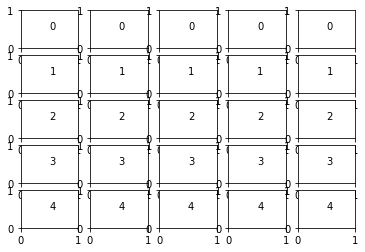

In [22]:
rows = 5
cols = 5
fig, axes = plt.subplots(rows, cols)

for r in range(rows):
    for c in range(cols):
        axes[r,c].text(0.5,0.5,str(r))
        print(f'plotting at index [ {r} , {c}]')

Now we can just replace *r* with a formula that counts every single subplot. This formula can be used in the next step, to give the *plot_stat_map* function's *cut_coords* parameter a position for every plot in our "cuts" *np.arange*. 

plotting at index [ 0 , 0]
plotting at index [ 0 , 1]
plotting at index [ 0 , 2]
plotting at index [ 0 , 3]
plotting at index [ 0 , 4]
plotting at index [ 1 , 0]
plotting at index [ 1 , 1]
plotting at index [ 1 , 2]
plotting at index [ 1 , 3]
plotting at index [ 1 , 4]
plotting at index [ 2 , 0]
plotting at index [ 2 , 1]
plotting at index [ 2 , 2]
plotting at index [ 2 , 3]
plotting at index [ 2 , 4]
plotting at index [ 3 , 0]
plotting at index [ 3 , 1]
plotting at index [ 3 , 2]
plotting at index [ 3 , 3]
plotting at index [ 3 , 4]
plotting at index [ 4 , 0]
plotting at index [ 4 , 1]
plotting at index [ 4 , 2]
plotting at index [ 4 , 3]
plotting at index [ 4 , 4]


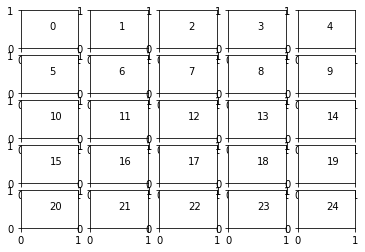

In [23]:
rows = 5
cols = 5
fig, axes = plt.subplots(rows, cols)

for r in range(rows):
    for c in range(cols):
        axes[r,c].text(0.5,0.5,str(r*cols+c))
        print(f'plotting at index [ {r} , {c}]')

Let's implement this into our mosaic function and see what happens.

In [24]:
def mosaic(axis,i=None,j=None,k=None,rows=None,cols=None,thresh=3.15): 
    if i is None or i < -55:
        i = -55
    if j is None or j > 55:
        j = 55
    if rows is None or rows <= 0:
        rows = 4
    if cols is None or cols <= 0:
        cols = 4
    if k is None or k <= 0:
        k = np.ceil((abs(i)+j)/(rows*cols))
    cuts = np.arange(i,j,k)
    rsn_img='rsn_img.png'
    fig, axes = plt.subplots(rows,cols, figsize=(10,10))
    print(cuts)
    for r in range(rows):
        for c in range(cols):
            display=plotting.plot_stat_map(rsn_four, display_mode=axis, axes=axes[r,c], cut_coords=[cuts[r*cols+c]], threshold=thresh)
            print(f'plotting at index [ {r} , {c}]')
    display.savefig(rsn_img)
    


[-55. -50. -45. -40. -35. -30. -25. -20. -15. -10.  -5.   0.   5.  10.
  15.  20.  25.  30.  35.  40.  45.  50.]
plotting at index [ 0 , 0]
plotting at index [ 0 , 1]
plotting at index [ 0 , 2]
plotting at index [ 0 , 3]
plotting at index [ 0 , 4]
plotting at index [ 1 , 0]
plotting at index [ 1 , 1]
plotting at index [ 1 , 2]
plotting at index [ 1 , 3]
plotting at index [ 1 , 4]
plotting at index [ 2 , 0]
plotting at index [ 2 , 1]
plotting at index [ 2 , 2]
plotting at index [ 2 , 3]
plotting at index [ 2 , 4]
plotting at index [ 3 , 0]
plotting at index [ 3 , 1]
plotting at index [ 3 , 2]
plotting at index [ 3 , 3]
plotting at index [ 3 , 4]
plotting at index [ 4 , 0]
plotting at index [ 4 , 1]


IndexError: ignored

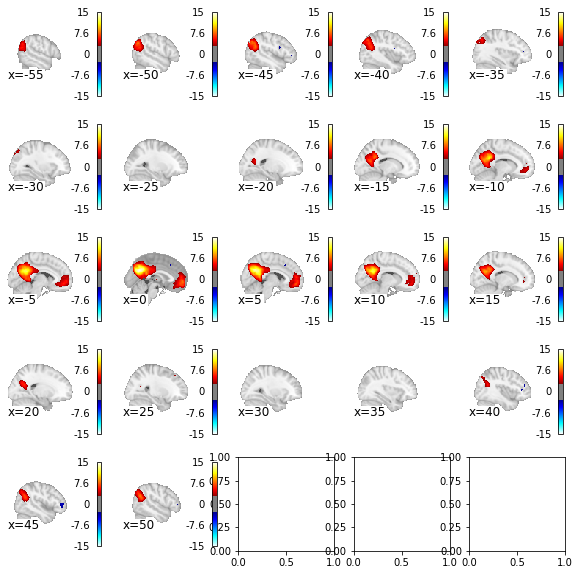

In [25]:
mosaic(axis='x', rows=5, cols=5)

Oh, that didn't work out too well. When you look at the error message it looks like we have a problem with our indices. Have a look at it and try to figure out what the issue is.

It seems that the bug occurs when the *np.array* is being exhausted before all our subplots are filled. Our function tries to iterate over all our rows and columns, but the range isn't large enough.

First of all we strip our code down to the core, so we don't have to set the parameters and run the function while we troubleshoot.

The error happens during the iteration over our subplot grid - in our nested *for-loop*. We have to stop the iteration at the point our *np.array* is getting exhausted. How about we try this with an *if-statement* that removes the affected positions in the grid, when the last point of our array is reached. For this we need the 'cut_coords' value for our condition, so let's define the variable right at the start of our inner loop (have a quick look at our code and ask yourself, why we put it there). Then we formulate our condition in words: "If the position in our np.array (basically our cut_coords variable) is higher than the last position in our np.array, we remove the subplots and use 'break' to stop the operation." Now we translate this into code and put it after the cut_coords variable.

Remember: We still have to set the cut_coords variable in square brackets, because it is positional information for our np.array.

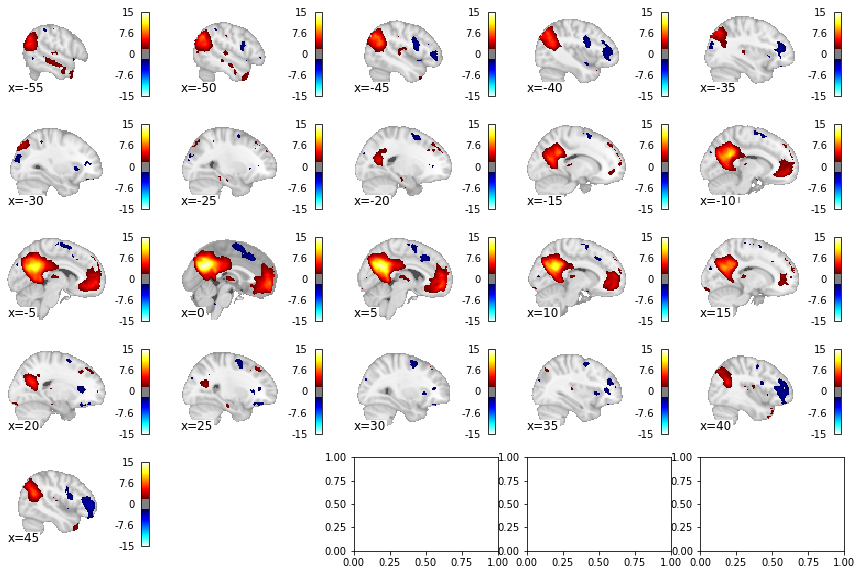

In [26]:
i = -55
j = 55
rows = 5
cols = 5
k = np.ceil((abs(i)+j)/(rows*cols))
cuts = np.arange(i,j,k)
rsn_img = 'rsn_img.png'

fig, axes = plt.subplots(rows, cols, figsize=(15,10))

for r in range(rows):
    for c in range(cols):
        cut_coords=cuts[r*cols+c]
        if cut_coords >= cuts[-1]:
            axes[r,c].remove()
            break
        display=plotting.plot_stat_map(rsn_four, display_mode='x', axes=axes[r,c], cut_coords=[cut_coords], threshold=2)
        

display.savefig(rsn_img)

That is not what we wanted to happen. The reason that only one empty subplot is removed, is that the whole operation is stopped after our if-condition was triggered. Although this got rid of the error message, it is not what we had in mind, so let's try again.

We have to reformulate our if statement a little. What we want is that, as long as our position in our np.array is smaller than the total amount of positions in our np.array, we want our slices to be plotted. But if the cut_coords is higher than our available positions, we want to remove these subplots. 
Maybe you noticed, that it is not really necessary to define an extra variable for our cut_coords outside the *plot_stat_map* function. We can just use the formula directly in the if statement, so we have less code and it becomes a bit clearer.

Take a few minutes to think about how we could formulate this in code.(hint: you'll need an *else*-statement after the *if*-statement and for expressing the amount of position in our *np.array* the *len()* function comes in handy)

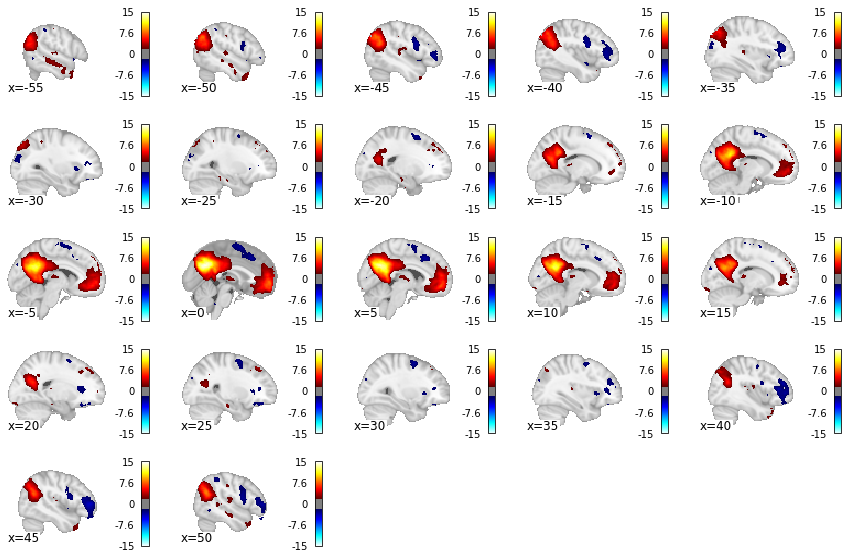

In [27]:
i = -55
j = 55
rows = 5
cols = 5
k = np.ceil((abs(i)+j)/(rows*cols))
cuts = np.arange(i,j,k)
rsn_img = 'rsn_img.png'

fig, axes = plt.subplots(rows, cols, figsize=(15,10))

for r in range(rows):
    for c in range(cols):
        if r*cols+c < len(cuts):
            display=plotting.plot_stat_map(rsn_four, display_mode='x', axes=axes[r,c], cut_coords=[cuts[r*cols+c]], threshold=2)
        else:
            axes[r,c].remove()
    
display.savefig(rsn_img)

Very good! Make sure you understand every operation and how it leads to this outcome.

Now we can add our previous code again and make it a function. And while we do that, let's add the threshold of the *plot_stat_map* function as definable parameter with an if condition as we did with our other parameters.

In [28]:
def mosaic(axis,i=None,j=None,k=None,rows=None,cols=None,thresh=None): 
    if i is None or i < -55:
        i = -55
    if j is None or j > 55:
        j = 55
    if rows is None or rows <= 0:
        rows = 4
    if cols is None or cols <= 0:
        cols = 4
    if k is None or k <= 0:
        k = np.ceil((abs(i)+j)/(rows*cols))
    if thresh is None:
        thresh = 3.15
    cuts = np.arange(i,j,k)
    rsn_img='rsn_img.png'
    fig, axes = plt.subplots(rows,cols, figsize=(20,10))
    for r in range(rows):
        for c in range(cols):
            if r*cols+c < len(cuts):
                display=plotting.plot_stat_map(rsn_four, display_mode=axis, axes=axes[r,c], cut_coords=[cuts[r*cols+c]], threshold=thresh)
            else:
                axes[r,c].remove()
    display.savefig(rsn_img)
    


Note that I adjusted the figsize a little bit, so the layout looks better if we want to plot more columns than rows.

In [ ]:
mosaic(axis='x',rows=3, cols=8)

In [ ]:
mosaic(axis='x',rows=5, cols=5)

Below I will show you a way an experienced python programmer would do it and you can try and figure out what's going on in the code. To do that you maybe have to extract some parts of it into your own separate notebook and have a closer look at the different operations.

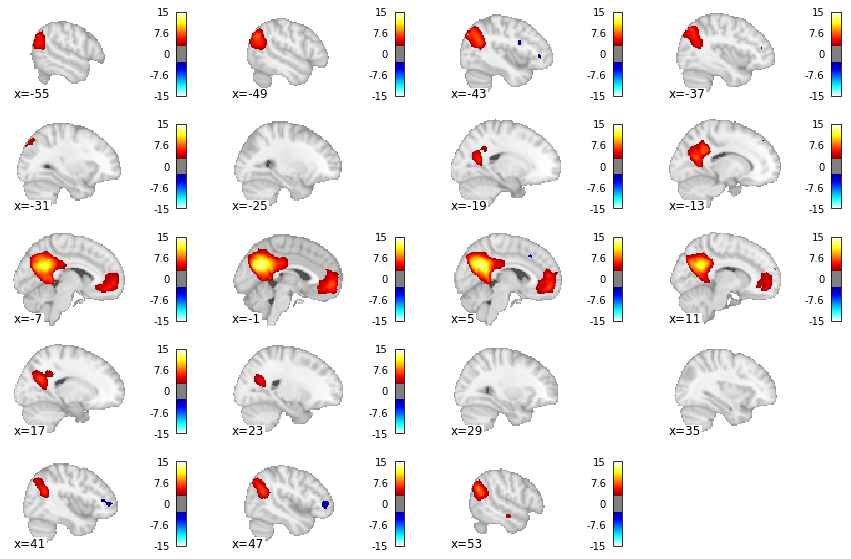

In [29]:
def mosaic_alt(axis,i=None,j=None,k=None,rows=None,cols=None,thresh=3.15):    
    if i is None or i < -55:
        i = -55
    if j is None or j > 55:
        j = 55
    if rows is None or rows <= 0:
        rows = 4
    if cols is None or cols <= 0:
        cols = 4
    if k is None or k <= 0:
        k = np.ceil((abs(i)+j)/(rows*cols))
    cuts = np.arange(i,j,k)
    N = len(cuts)
    rsn_img = 'rsn_img.png'

    fig, axes = plt.subplots(rows, cols, figsize=(15,10))

    for ax, cut in zip(axes.flat,cuts):
            display=plotting.plot_stat_map(rsn_four, display_mode=axis, axes=ax, cut_coords=[cut], threshold=thresh)

    for ax in axes.flat[N:]:
        ax.remove()
    display.savefig(rsn_img)
    
mosaic_alt(axis='x',rows=5)

Our function is already a useful tool for visualizing our data, but we can add another practical thing. Until now we were working with one dataset we embedded in our function. But what if we want to change the data we want to plot? We can add an extra parameter for that at the beginning of our function-header. This way we can write the *datasets.fetch* command at the beginning of our function (or just name a variable for it with said command). Don't forget to change the variable in the *plot_stat_map* function. And while we're at it: let's also rearrange the order of our parameters, so that you can type for example *mosaic(data,'x',5,5,30,-30,3)*. That seems like a more intuitive order.

In [30]:
def mosaic(data,axis,rows=None,cols=None,i=None,j=None,k=None,thresh=None): 
    if i is None or i < -55:
        i = -55
    if j is None or j > 55:
        j = 55
    if rows is None or rows <= 0:
        rows = 4
    if cols is None or cols <= 0:
        cols = 4
    if k is None or k <= 0:
        k = np.ceil((abs(i)+j)/(rows*cols))
    if thresh is None:
        thresh = 3.15
    cuts = np.arange(i,j,k)
    data_img='rsn_img.png'
    fig, axes = plt.subplots(rows,cols, figsize=(20,10))
    for r in range(rows):
        for c in range(cols):
            if r*cols+c < len(cuts):
                display=plotting.plot_stat_map(data, display_mode=axis, axes=axes[r,c], cut_coords=[cuts[r*cols+c]], threshold=thresh)
            else:
                axes[r,c].remove()
    display.savefig(data_img)

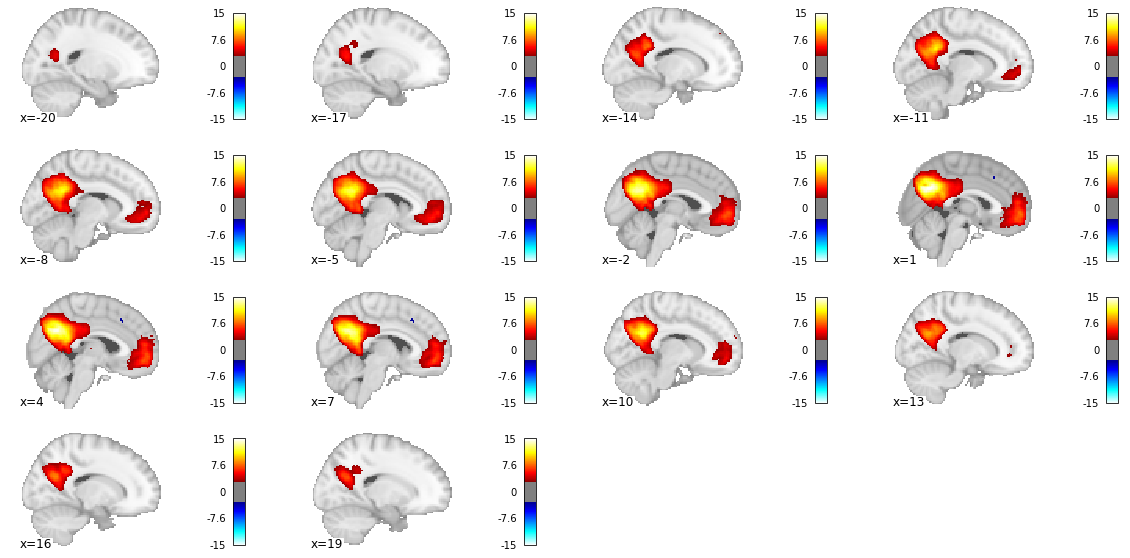

In [31]:
mosaic(image.index_img(datasets.fetch_atlas_smith_2009()['rsn10'],3),'x',4,4,-20,20,3)